<p style="color: darkred; font-size: 50px; text-align: center;"><b>Time Series Analysis</b></p>
<p style="color: darkred; font-size: 30px; text-align: center;">Labs #1. Introduction to Time Series in Python</p>
<p style="font-size: 20px; text-align: center;">Paweł Sakowski, Maciej Świtała</p>
<p style="font-size: 20px; text-align: center;">Spring 2025</p>
<p align="center">
  <img src="img/wne-logo-new-en.jpg" width="498" height="107">
</p>

### Libraries

To start with, let us install the libraries we need, obviously, if those are not already installed. This can be done via the coomand line or from the Jupyter Notebook as presented below.

In [39]:
#!pip install pandas matplotlib seaborn yfinance
#!pip install --upgrade yfinance # it can happen that yfinance update is neccessary

Next, let us load all the libraries into Python.

In [1]:
import sys # here, for accessing the size of an object

import pandas as pd # for data manipulation

import matplotlib.pyplot as plt # for vizualization
import matplotlib.dates as mdates # for data formatting when visualizing
import seaborn as sns # for enhanced visualization

import yfinance as yf # for importing data directly from finance.yahoo.com

### 1. Time series data import

The first step before proceeding with any analyses (unless we generate something, i.e., for the purpose of performing a stochastic experiment) is loading the data.

In [3]:
df_apple = pd.read_csv("data/APPLE.csv")

In [4]:
df_apple.shape

(8937, 6)

In [5]:
df_apple.head()

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.41045,0.41543,0.40548,0.41045,23979532.0
1,1984-09-10,0.41045,0.41169,0.40056,0.40799,18612029.0
2,1984-09-11,0.41169,0.42286,0.41169,0.41543,43888268.0
3,1984-09-12,0.41543,0.41790,0.40300,0.40300,38340145.0
4,1984-09-13,0.42537,0.42657,0.42537,0.42537,59713359.0


In [6]:
df_apple.tail()

,Date,Open,High,Low,Close,Volume
8932,2020-02-19,320.00,324.57,320.00,323.62,23495991.0
8933,2020-02-20,322.63,324.65,318.21,320.30,25141489.0
8934,2020-02-21,318.62,320.45,310.50,313.05,32426415.0
8935,2020-02-24,297.26,304.18,289.23,298.18,55548828.0
8936,2020-02-25,300.95,302.53,286.13,288.08,57668364.0


In [7]:
df_apple.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [8]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8937 entries, 0 to 8936
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8937 non-null   object 
 1   Open    8937 non-null   float64
 2   High    8937 non-null   float64
 3   Low     8937 non-null   float64
 4   Close   8937 non-null   float64
 5   Volume  8936 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.1+ KB


### 2. Formatting the timestamps

It appears that the `Date` column is coded as an `object` type. We need to convert it to a proper format.

In [9]:
df_apple["Date"] = pd.to_datetime(df_apple["Date"])

In [10]:
df_apple.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [11]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8937 entries, 0 to 8936
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8937 non-null   datetime64[ns]
 1   Open    8937 non-null   float64       
 2   High    8937 non-null   float64       
 3   Low     8937 non-null   float64       
 4   Close   8937 non-null   float64       
 5   Volume  8936 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 419.1 KB


Now, as the `Date` column is stored in a feasible format, we can proceed further.

Still, it could happen, that the format of the column to be converted would be different. Let us consider the functionalities of `pd.to_datetime()` function deeper. Below, some examples were presented.

In [12]:
dates = pd.Series(['2024.10.27', '2024.10.28', '2024.10.29', '2024.10.30', '2024.10.31'])
pd.to_datetime(dates)

0   2024-10-27
1   2024-10-28
2   2024-10-29
3   2024-10-30
4   2024-10-31
dtype: datetime64[ns]

In [13]:
dates = pd.Series(['2024, Oct 27', '2024, Oct 28', '2024, Oct 29', '2024, Oct 30', '2024, Oct 31'])
pd.to_datetime(dates)

0   2024-10-27
1   2024-10-28
2   2024-10-29
3   2024-10-30
4   2024-10-31
dtype: datetime64[ns]

In [14]:
dates = pd.Series(['27.10.24 r.', '28.10.24 r.', '29.10.24 r.', '30.10.24 r.', '31.10.24 r.'])
pd.to_datetime(dates, format='%d.%m.%y r.') # here, a detailed specification of `format` is required

0   2024-10-27
1   2024-10-28
2   2024-10-29
3   2024-10-30
4   2024-10-31
dtype: datetime64[ns]

In [15]:
dates = pd.Series(['2024x10x27', '2024x10x28', '2024x10x29', '2024x10x30', '2024x10x31'])
pd.to_datetime(dates, format='%Yx%mx%d') # here, a detailed specification of `format` is required

0   2024-10-27
1   2024-10-28
2   2024-10-29
3   2024-10-30
4   2024-10-31
dtype: datetime64[ns]

In [16]:
dates = pd.Series(['25.09.2023 00:00:01.132 GMT+0200', '25.09.2023 00:00:01.997 GMT+0200', '25.09.2023 00:00:02.045 GMT+0200', '25.09.2023 00:00:02.627 GMT+0200', '25.09.2023 00:00:03.1032 GMT+0200'])

dates = dates.str.replace(r' GMT\+\d{4}', '', regex=True) # we deal with timezone here, let us remove it in an as simple manner as possible
pd.to_datetime(dates, format='%d.%m.%Y %H:%M:%S.%f') # again, another detailed specification of `format` is required

0   2023-09-25 00:00:01.132000
1   2023-09-25 00:00:01.997000
2   2023-09-25 00:00:02.045000
3   2023-09-25 00:00:02.627000
4   2023-09-25 00:00:03.103200
dtype: datetime64[ns]

### 3. Timestamp manipulation

We aim at a proper formatting of the timestamp as it allows for potentially useful operations on them:

In [17]:
df_apple.loc[1,'Date'] - df_apple.loc[0,'Date']

Timedelta('3 days 00:00:00')

Also, we can use method extracting categories from dates easily:

In [18]:
df_apple.loc[0,'Date'].year

1984

In [19]:
df_apple.loc[0,'Date'].month

9

In [20]:
df_apple.loc[0,'Date'].hour

0

In [21]:
df_apple.loc[0,'Date'].dayofyear

251

In [22]:
df_apple.loc[0,'Date'].dayofweek

4

All of the above appears to make the further data exploration easier.

### 4. Proper formatting of a time series object

To proceed efficiently, it is recommended for the time series objects to be stored with timestamps in the row indexes. Let us demonstrate this transformation.

In [23]:
df_apple_ts = df_apple.set_index("Date", inplace=False) # here, we put dates into rowindex

In [24]:
df_apple_ts.head()

,Open,High,Low,Close,Volume
Date,,,,,
1984-09-07,0.41045,0.41543,0.40548,0.41045,23979532.0
1984-09-10,0.41045,0.41169,0.40056,0.40799,18612029.0
1984-09-11,0.41169,0.42286,0.41169,0.41543,43888268.0
1984-09-12,0.41543,0.41790,0.40300,0.40300,38340145.0
1984-09-13,0.42537,0.42657,0.42537,0.42537,59713359.0


In [25]:
df_apple_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8937 entries, 1984-09-07 to 2020-02-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    8937 non-null   float64
 1   High    8937 non-null   float64
 2   Low     8937 non-null   float64
 3   Close   8937 non-null   float64
 4   Volume  8936 non-null   float64
dtypes: float64(5)
memory usage: 418.9 KB


Such an operation makes the object slightly smaller. Here, the difference is neglectable but in case of huge datasets, it is worth to proceed this way.

In [26]:
print(sys.getsizeof(df_apple)) # size before transformation
print(sys.getsizeof(df_apple_ts)) # size after transformation

429140
429008


### 5. Downloading data directly from finance.yahoo.com

Thanks to `yfinance` Python library, we are able to download financial data directly from finance.yahoo.com. Let us demonstrate how it works.

In [27]:
apple = yf.download("AAPL")

[*********************100%***********************]  1 of 1 completed


In [28]:
apple.shape

(11139, 5)

In [29]:
apple.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600


In [30]:
apple.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-02-14,244.600006,245.550003,240.990005,241.250000,40896200
2025-02-18,244.470001,245.179993,241.839996,244.149994,48822500
2025-02-19,244.869995,246.009995,243.160004,244.660004,32204200
2025-02-20,245.830002,246.779999,244.289993,244.940002,32278300
2025-02-21,247.354996,248.690002,245.220001,245.964996,23418645


In [31]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11139 entries, 1980-12-12 to 2025-02-21
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11139 non-null  float64
 1   (High, AAPL)    11139 non-null  float64
 2   (Low, AAPL)     11139 non-null  float64
 3   (Open, AAPL)    11139 non-null  float64
 4   (Volume, AAPL)  11139 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 522.1 KB


One can also specify the time horizon to be considered.

In [32]:
apple = yf.download("AAPL", start="2006-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed


In [33]:
apple.shape

(4781, 5)

In [34]:
apple.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2006-01-03,2.249496,2.249496,2.174262,2.178174,807234400
2006-01-04,2.256117,2.286511,2.241972,2.260931,619603600
2006-01-05,2.238363,2.254011,2.219404,2.251904,449422400
2006-01-06,2.296142,2.308180,2.243478,2.264544,704457600
2006-01-09,2.288617,2.323226,2.279289,2.309081,675040800


In [35]:
apple.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500
2024-12-31,250.144974,253.001833,249.156056,252.162760,39480700


In [36]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4781 entries, 2006-01-03 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   4781 non-null   float64
 1   (High, AAPL)    4781 non-null   float64
 2   (Low, AAPL)     4781 non-null   float64
 3   (Open, AAPL)    4781 non-null   float64
 4   (Volume, AAPL)  4781 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 224.1 KB


As you can see, the dates are already stored in row index. One can also download multiple data, knowing the symbols.

In [37]:
symbols = ["AAPL", "GE", "MSFT", "KO"]

data = {}
for symbol in symbols:
    data[symbol] = yf.download(symbol, start="2006-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [38]:
type(data)

dict

In [39]:
data.keys()

dict_keys(['AAPL', 'GE', 'MSFT', 'KO'])

Let us investigate the Adjusted Closing Prices of the considered series for the purpose of further demonstration.

In [40]:
df_quotes = pd.DataFrame({symbol: data[symbol]["Close"][symbol] for symbol in symbols})

In [41]:
df_quotes.shape

(4781, 4)

In [42]:
df_quotes.head()

,AAPL,GE,MSFT,KO
Date,,,,
2006-01-03,2.249496,104.982582,18.815386,11.458993
2006-01-04,2.256117,104.834183,18.906513,11.436574
2006-01-05,2.238363,104.567032,18.920544,11.492618
2006-01-06,2.296142,105.279381,18.864462,11.601883
2006-01-09,2.288617,105.012245,18.829407,11.657915


In [43]:
df_quotes.tail()

,AAPL,GE,MSFT,KO
Date,,,,
2024-12-24,257.916443,171.211075,438.450836,62.840000
2024-12-26,258.735504,171.869995,437.233276,62.570000
2024-12-27,255.309296,170.080002,429.668457,62.450001
2024-12-30,251.923019,168.100006,423.979858,62.029999
2024-12-31,250.144974,166.789993,420.656525,62.259998


In [44]:
df_quotes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4781 entries, 2006-01-03 to 2024-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4781 non-null   float64
 1   GE      4781 non-null   float64
 2   MSFT    4781 non-null   float64
 3   KO      4781 non-null   float64
dtypes: float64(4)
memory usage: 186.8 KB


### 6. Basic vizualization of time series data

Let us explore vizualization possibilities offered by Python.

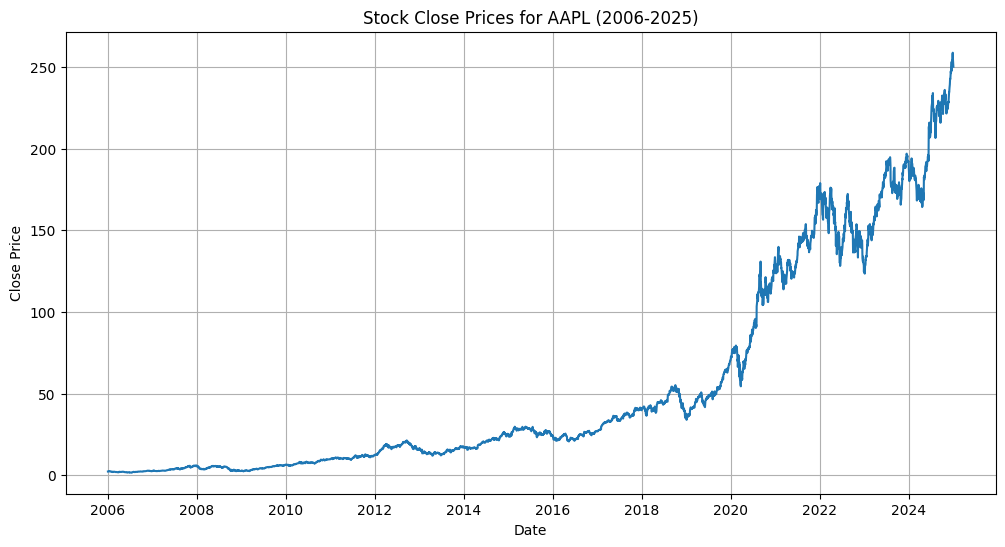

In [60]:
# Creating a figure with a specified size
plt.figure(figsize=(12, 6))  # A wider figure for better readability

# Plotting the adjusted closing prices for AAPL
plt.plot(df_quotes.index, df_quotes["AAPL"])

# Setting the title and axis labels
plt.title("Stock Close Prices for AAPL (2006-2025)")  # Adding a title to the plot
plt.xlabel("Date")  # Labeling the x-axis
plt.ylabel("Close Price")  # Labeling the y-axis

# Adding a grid for better readability
plt.grid()

# Displaying the plot
plt.show()

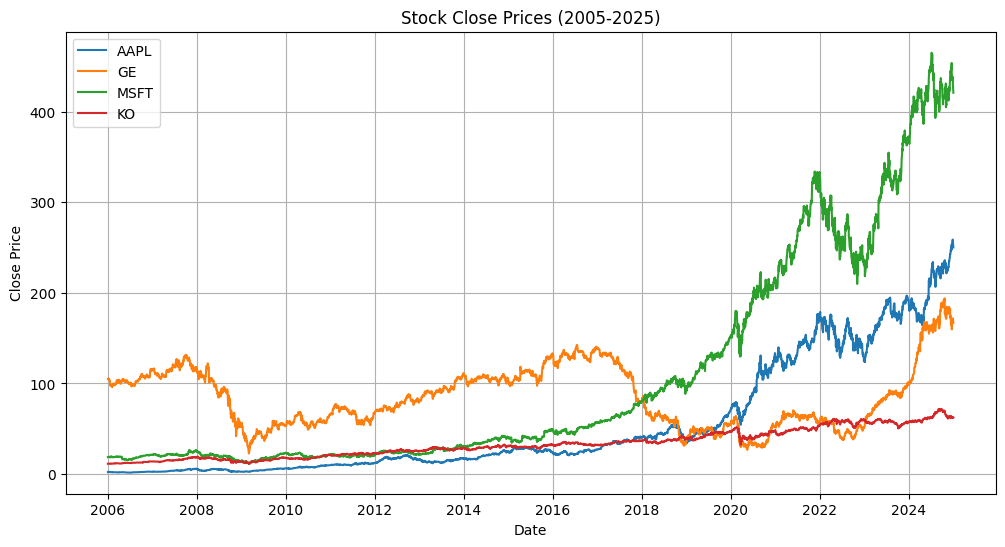

In [46]:
# Creating a figure with a specified size
plt.figure(figsize=(12, 6))  # A wider figure for better visualization

# Looping through the list of stock symbols and plotting their adjusted closing prices
for symbol in symbols:
    plt.plot(df_quotes.index, df_quotes[symbol], label=symbol)  # Plotting each stock's price

# Setting the title and axis labels
plt.title("Stock Close Prices (2005-2025)")  # Adding a title to the plot
plt.xlabel("Date")  # Labeling the x-axis
plt.ylabel("Close Price")  # Labeling the y-axis

# Adding a legend to differentiate the stocks
plt.legend()

# Enabling a grid for better readability
plt.grid()

# Displaying the plot
plt.show()

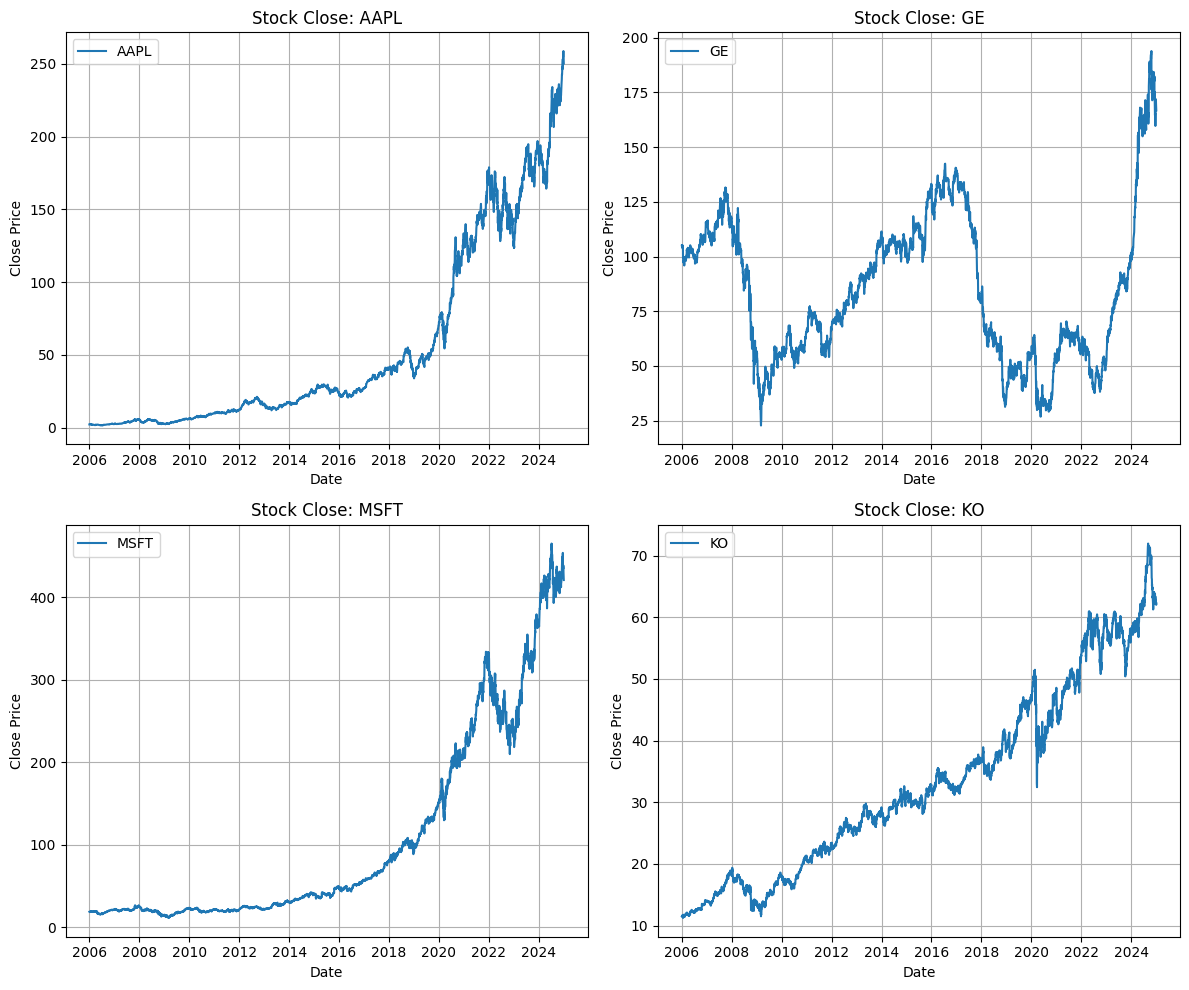

In [47]:
# Creating a 2x2 grid of subplots with a specified figure size
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flattening the 2D array of axes for easier iteration
axes = axes.flatten()

# Looping through the first four stock symbols to plot their data
for i, symbol in enumerate(symbols):
    if i < 4:  # Ensuring only the first four symbols are plotted
        axes[i].plot(df_quotes.index, df_quotes[symbol], label=symbol)  # Plotting the stock prices
        axes[i].set_title(f"Stock Close: {symbol}")  # Setting the title for each subplot
        axes[i].set_xlabel("Date")  # Labeling the x-axis
        axes[i].set_ylabel("Close Price")  # Labeling the y-axis
        axes[i].legend()  # Adding a legend for each subplot
        axes[i].grid()  # Enabling grid for better readability

# Adjusting the layout to prevent overlapping elements
plt.tight_layout()

# Displaying the plot
plt.show()

### 7. Advanced vizualization of time series data

The vizualizations above can be enhanced in multiple ways. Let us demonstrate it.

C:\Users\mswitala\AppData\Local\Temp\ipykernel_9596\1652612023.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


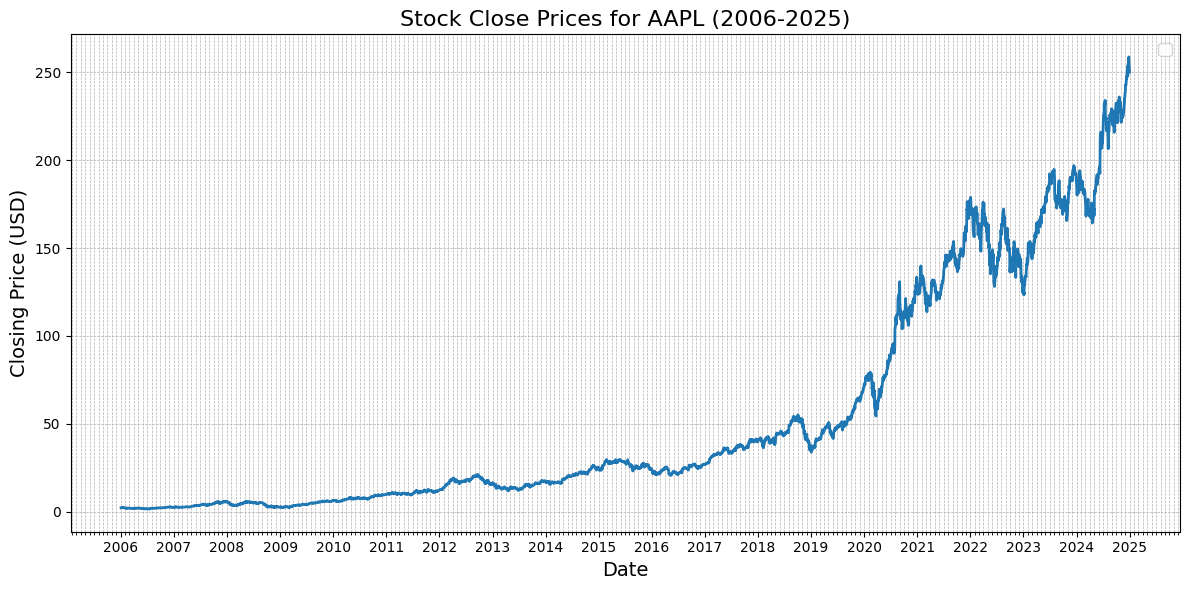

In [48]:
# Creating the figure with a specified size
plt.figure(figsize=(12, 6))  # A wider figure for better readability

# Plotting the adjusted closing prices for AAPL
plt.plot(df_quotes.index, df_quotes["AAPL"], linewidth=2)

# Setting the title and axis labels with appropriate font sizes
plt.title("Stock Close Prices for AAPL (2006-2025)", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)

# Formatting the X-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major gridlines at yearly intervals
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Minor gridlines at monthly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formatting major ticks as years

# Adding a grid for visual clarity
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

# Adding a legend with a specified font size
plt.legend(fontsize=12)

# Adjusting the layout to prevent overlapping elements
plt.tight_layout()

# Displaying the plot
plt.show()

We can explore further in case we need to demonstrate anything specific. For example, let us calculate exponential moving averages for different time spans and compare the prices with those.

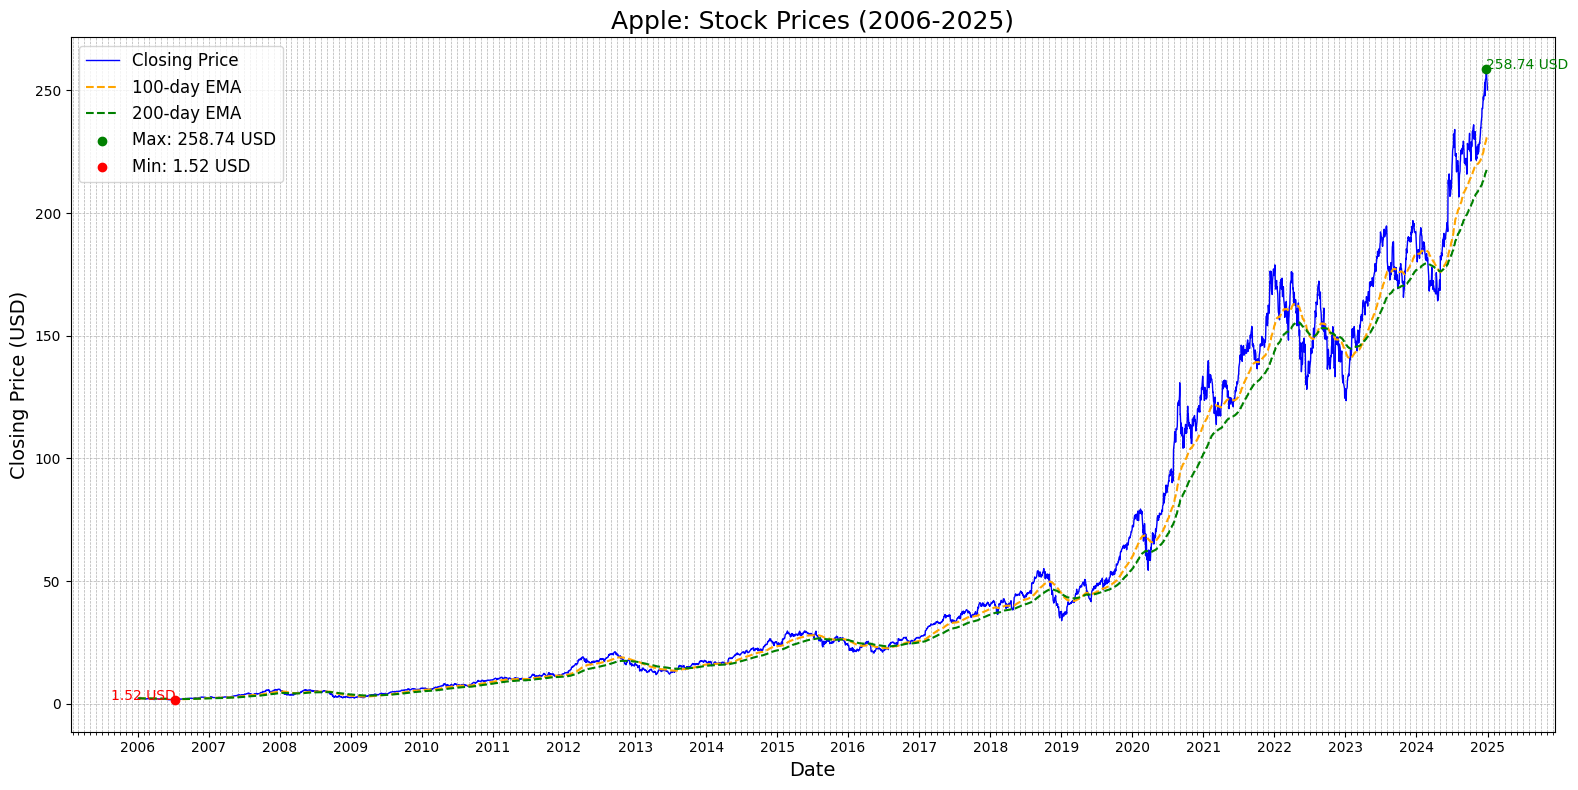

In [49]:
# Calculation of Exponential Moving Averages (EMA)
closing_prices = df_quotes["AAPL"]
data['EMA_100'] = closing_prices.ewm(span=100, adjust=False).mean()  # 100-day EMA
data['EMA_200'] = closing_prices.ewm(span=200, adjust=False).mean()  # 200-day EMA

# Creating the plot
plt.figure(figsize=(16, 8))  # Larger figure size for better readability
plt.plot(closing_prices, label='Closing Price', color='blue', linewidth=1)
plt.plot(data['EMA_100'], label='100-day EMA', color='orange', linestyle='--')
plt.plot(data['EMA_200'], label='200-day EMA', color='green', linestyle='--')

# Adding key points - maximum and minimum price
max_price = closing_prices.max()
min_price = closing_prices.min()
max_date = closing_prices.idxmax()
min_date = closing_prices.idxmin()
plt.scatter(max_date, max_price, color='green', label=f'Max: {max_price:.2f} USD', zorder=5)
plt.scatter(min_date, min_price, color='red', label=f'Min: {min_price:.2f} USD', zorder=5)

# Annotations for the highest and lowest price
plt.text(max_date, max_price, f'{max_price:.2f} USD', color='green', fontsize=10, ha='left')
plt.text(min_date, min_price, f'{min_price:.2f} USD', color='red', fontsize=10, ha='right')

# Axis formatting and aesthetics
plt.title('Apple: Stock Prices (2006-2025)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks on X-axis every year
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formatting major ticks as years
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

# Adding a legend and adjusting layout
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()

# Displaying the plot
plt.show()

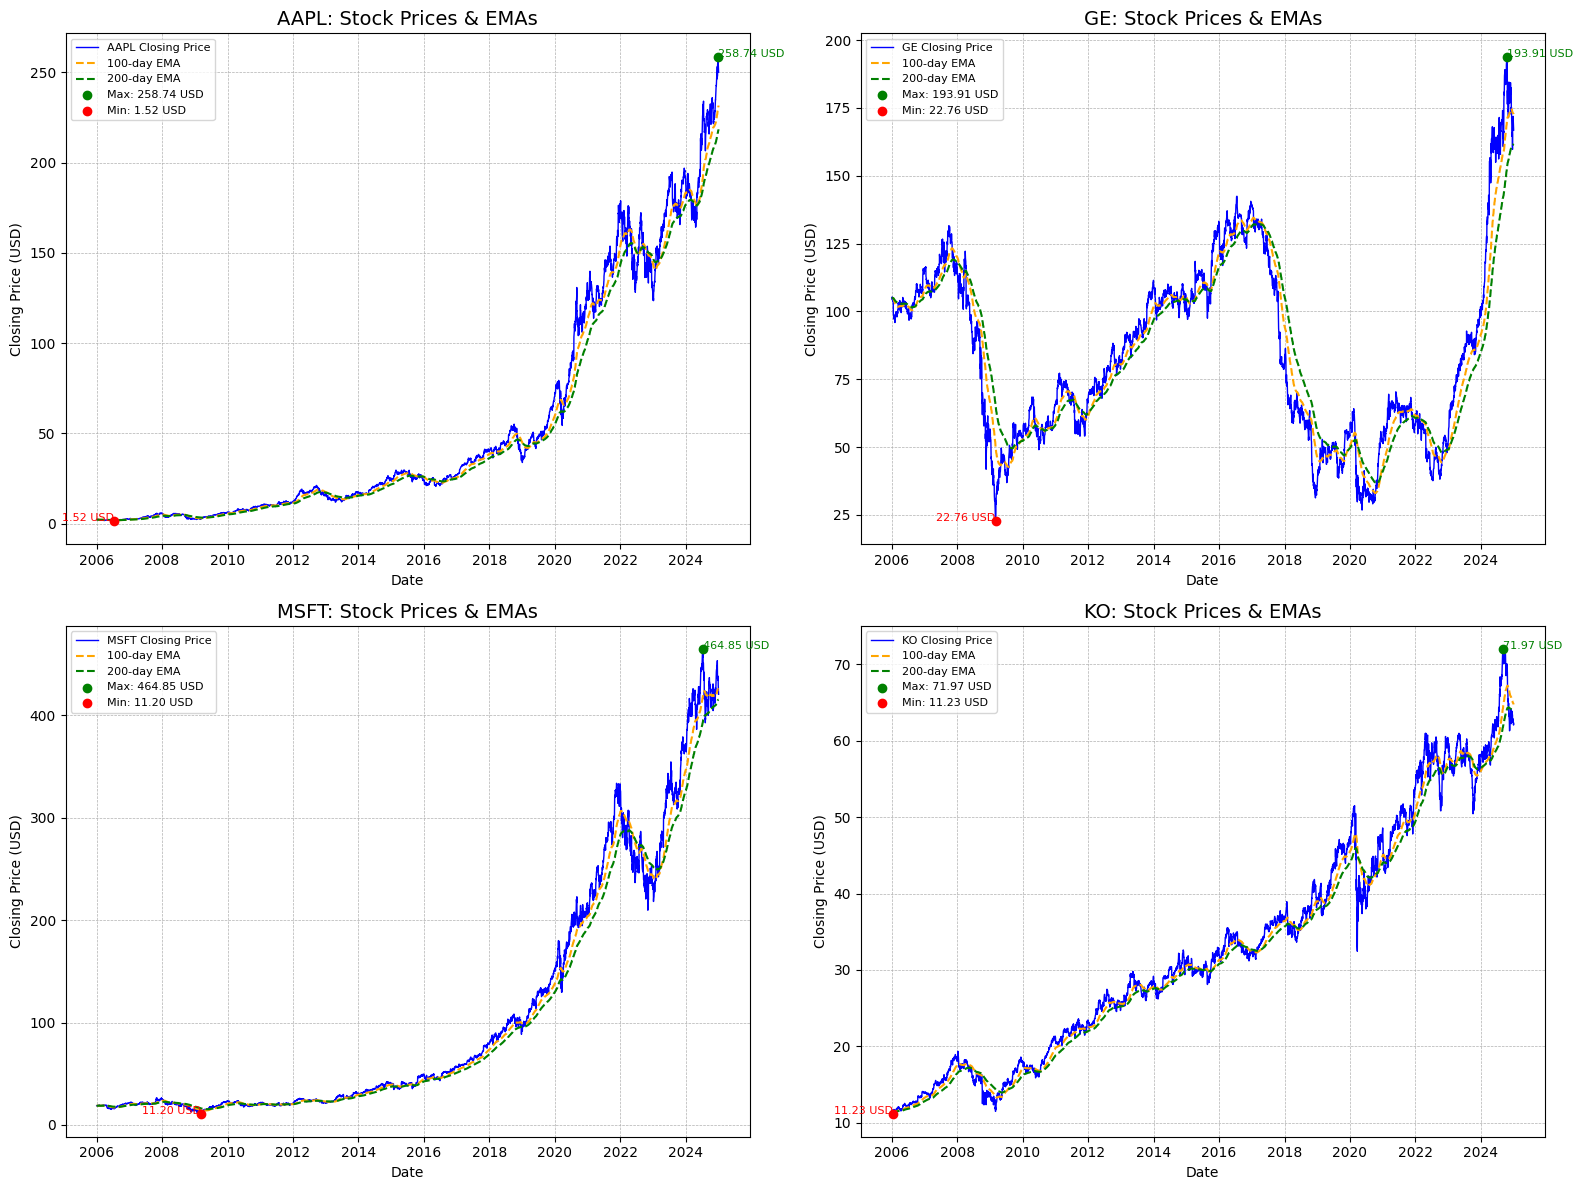

In [50]:
# Creating a 2x2 grid of subplots with a specified figure size
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flattening the 2D array of axes for easier iteration
axes = axes.flatten()

# Looping through the first four stock symbols to plot their EMAs
for i, symbol in enumerate(symbols):
    if i < 4:  # Ensuring only the first four symbols are plotted
        closing_prices = df_quotes[symbol]
        
        # Calculating EMAs
        ema_100 = closing_prices.ewm(span=100, adjust=False).mean()
        ema_200 = closing_prices.ewm(span=200, adjust=False).mean()

        # Plotting closing prices and EMAs
        axes[i].plot(closing_prices, label=f'{symbol} Closing Price', color='blue', linewidth=1)
        axes[i].plot(ema_100, label='100-day EMA', color='orange', linestyle='--')
        axes[i].plot(ema_200, label='200-day EMA', color='green', linestyle='--')

        # Adding key points - maximum and minimum price
        max_price = closing_prices.max()
        min_price = closing_prices.min()
        max_date = closing_prices.idxmax()
        min_date = closing_prices.idxmin()
        axes[i].scatter(max_date, max_price, color='green', label=f'Max: {max_price:.2f} USD', zorder=5)
        axes[i].scatter(min_date, min_price, color='red', label=f'Min: {min_price:.2f} USD', zorder=5)

        # Annotations for the highest and lowest price
        axes[i].text(max_date, max_price, f'{max_price:.2f} USD', color='green', fontsize=8, ha='left')
        axes[i].text(min_date, min_price, f'{min_price:.2f} USD', color='red', fontsize=8, ha='right')

        # Setting title and labels
        axes[i].set_title(f"{symbol}: Stock Prices & EMAs", fontsize=14)
        axes[i].set_xlabel('Date', fontsize=10)
        axes[i].set_ylabel('Closing Price (USD)', fontsize=10)
        axes[i].legend(fontsize=8, loc='upper left')
        axes[i].grid(visible=True, which='both', linestyle='--', linewidth=0.5)

# Adjusting the layout to prevent overlapping elements
plt.tight_layout()

# Displaying the plot
plt.show()

### 8. Further time series data processing

Lagging is a frequent operation in time series analysis. Let us demonstrate how to calculated the lags easily.

In [65]:
df_apple_ts["Close"].shift(1) # here we calculate values lagged by 1 working day

Date
1984-09-07          NaN
1984-09-10      0.41045
1984-09-11      0.40799
1984-09-12      0.41543
1984-09-13      0.40300
                ...    
2020-02-19    319.00000
2020-02-20    323.62000
2020-02-21    320.30000
2020-02-24    313.05000
2020-02-25    298.18000
Name: Close, Length: 8937, dtype: float64

In [70]:
df_apple_ts["Close"].shift(5) # here we calculate values lagged by 5 working day

Date
1984-09-07       NaN
1984-09-10       NaN
1984-09-11       NaN
1984-09-12       NaN
1984-09-13       NaN
               ...  
2020-02-19    319.61
2020-02-20    327.20
2020-02-21    324.87
2020-02-24    324.95
2020-02-25    319.00
Name: Close, Length: 8937, dtype: float64

Another commonly applied operation is differencing the series. Let us demonstrate how to obtain first differences of the series under consideration:

In [67]:
df_apple_ts["Close"].diff(1)

Date
1984-09-07         NaN
1984-09-10    -0.00246
1984-09-11     0.00744
1984-09-12    -0.01243
1984-09-13     0.02237
                ...   
2020-02-19     4.62000
2020-02-20    -3.32000
2020-02-21    -7.25000
2020-02-24   -14.87000
2020-02-25   -10.10000
Name: Close, Length: 8937, dtype: float64

Obviously, one can obtain second differences (differences in differences) as well. Hardly ever operating on difference of a higher order is required.

In [71]:
df_apple_ts["Close"].diff(1).diff(1)

Date
1984-09-07         NaN
1984-09-10         NaN
1984-09-11     0.00990
1984-09-12    -0.01987
1984-09-13     0.03480
                ...   
2020-02-19    10.57000
2020-02-20    -7.94000
2020-02-21    -3.93000
2020-02-24    -7.62000
2020-02-25     4.77000
Name: Close, Length: 8937, dtype: float64

Still, sometimes, one need to consider seasonal difference, i.e., not between the subsequent values, rather values observed, e.g., every chosen day of the week, every month, etc. 

In [66]:
df_apple_ts["Close"].diff(5) # here, we operate on working days, so 5 means differences between the subsequent days of the week

Date
1984-09-07        NaN
1984-09-10        NaN
1984-09-11        NaN
1984-09-12        NaN
1984-09-13        NaN
1984-09-14    0.02109
1984-09-17    0.03471
1984-09-18    0.01114
1984-09-19    0.01490
1984-09-20   -0.00622
Name: Close, dtype: float64

Let us load another sample data. This time, it includes tick data (highly frequent, irregularily observed changes in prices) for gold (expressed in USD) for one day only, i.e., September 25, 2023.

In [51]:
XAUUSD_ticks = pd.read_csv("data/XAUUSD_Ticks_25.09.2023-25.09.2023.csv")

In [52]:
XAUUSD_ticks.shape

(72277, 5)

In [53]:
XAUUSD_ticks.head()

,Local time,Ask,Bid,AskVolume,BidVolume
0,25.09.2023 00:00:01.132 GMT+0200,1925.575,1924.335,450.0,450
1,25.09.2023 00:00:01.183 GMT+0200,1925.655,1924.365,450.0,450
2,25.09.2023 00:00:01.338 GMT+0200,1925.655,1924.385,450.0,450
3,25.09.2023 00:00:01.439 GMT+0200,1925.675,1924.385,450.0,450
4,25.09.2023 00:00:01.490 GMT+0200,1925.675,1924.365,450.0,450


In [75]:
XAUUSD_ticks.tail()

,Local time,Ask,Bid,AskVolume,BidVolume
72272,25.09.2023 22:59:55.111 GMT+0200,1916.206,1915.775,220.0,270
72273,25.09.2023 22:59:55.253 GMT+0200,1916.206,1915.614,220.0,220
72274,25.09.2023 22:59:55.947 GMT+0200,1916.252,1915.578,90.0,180
72275,25.09.2023 22:59:58.067 GMT+0200,1916.252,1915.585,90.0,90
72276,25.09.2023 22:59:58.118 GMT+0200,1916.352,1915.585,220.0,90


In [76]:
XAUUSD_ticks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72277 entries, 0 to 72276
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Local time  72277 non-null  object 
 1   Ask         72277 non-null  float64
 2   Bid         72277 non-null  float64
 3   AskVolume   72277 non-null  float64
 4   BidVolume   72277 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.8+ MB


Let us prepare a time series object consistently with the good practices presented before.

In [54]:
XAUUSD_ticks['Local time'] = XAUUSD_ticks['Local time'].str.replace(r' GMT\+\d{4}', '', regex=True) # removing the time zone symbols
XAUUSD_ticks['Local time'] = pd.to_datetime(XAUUSD_ticks['Local time'], format="%d.%m.%Y %H:%M:%S.%f") # setting up a proper datetime format
XAUUSD_ticks.set_index('Local time', inplace=True) # timestamp moved to the row index

In [55]:
XAUUSD_ticks.head()

,Ask,Bid,AskVolume,BidVolume
Local time,,,,
2023-09-25 00:00:01.132,1925.575,1924.335,450.0,450
2023-09-25 00:00:01.183,1925.655,1924.365,450.0,450
2023-09-25 00:00:01.338,1925.655,1924.385,450.0,450
2023-09-25 00:00:01.439,1925.675,1924.385,450.0,450
2023-09-25 00:00:01.490,1925.675,1924.365,450.0,450


We often aggregate irregularily spaced time series data (here bid and ask prices) into intervals of chosen width.

In [58]:
XAUUSD_1min = XAUUSD_ticks.resample('1min').agg({'Bid': ['min','max','first','last'], 'Ask': ['min','max','first','last']})

In [59]:
XAUUSD_1min.head()

Bid                                     Ask  \
                          min       max     first      last       min   
Local time                                                              
2023-09-25 00:00:00  1924.335  1925.334  1924.335  1925.104  1925.486   
2023-09-25 00:01:00  1924.998  1925.434  1925.135  1925.364  1925.536   
2023-09-25 00:02:00  1925.214  1925.954  1925.418  1925.895  1925.726   
2023-09-25 00:03:00  1925.648  1926.234  1925.915  1926.214  1926.136   
2023-09-25 00:04:00  1925.994  1926.324  1926.204  1926.064  1926.495   

                                                   
                          max     first      last  
Local time                                         
2023-09-25 00:00:00  1925.975  1925.575  1925.616  
2023-09-25 00:01:00  1925.946  1925.755  1925.876  
2023-09-25 00:02:00  1926.466  1925.926  1926.262  
2023-09-25 00:03:00  1926.745  1926.242  1926.726  
2023-09-25 00:04:00  1926.802  1926.716  1926.576

The above is in fact the very first step towards building the automated trading strategies.

### Exercises

1. Automatically download daily data from finance.yahoo.com for four freely selected stocks or indices over a chosen period. Plot the Adjusted Closing Prices for all series using different colors (both at one plot and separately, i.e. in a 2x2 layout). When plotting, mark the lowest and highest values of each series as presented above. Additionally, calculate the 100-day and 200-day Exponential Moving Averages (EMA) and plot them for each series.

2.  Load data from the location data/EURGBP-2023-08.csv. Change the variable names - the last two columns are the BID and ASK values for the EURGBP exchange rate, respectively. Convert the dates to the `datetime64` type. Insert the converted dates into the row indices of the analyzed `pandas` `DataFrame`. Then, perform aggregation - calculate the first and last values of ASK and BID at the end of each quarter. Create a simple plot of the BID-ASK spread values (i.e., ASK price - BID price) at the end of each quarter.